In [104]:
import pandas as pd
import numpy as np

df=pd.read_csv("OnlineRetail.csv",encoding=('ISO-8859-1'),low_memory=False)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,1.25,13313.0,United Kingdom
...,...,...,...,...,...,...,...,...
499423,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
499424,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
499425,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
499426,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [105]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

# EDA (Exploratory data analysis)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499428 entries, 0 to 499427
Data columns (total 8 columns):
InvoiceNo      499428 non-null object
StockCode      499428 non-null object
Description    498099 non-null object
Quantity       499428 non-null int64
InvoiceDate    499428 non-null object
UnitPrice      499428 non-null float64
CustomerID     379979 non-null float64
Country        499428 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 30.5+ MB


In [107]:
df.count()

InvoiceNo      499428
StockCode      499428
Description    498099
Quantity       499428
InvoiceDate    499428
UnitPrice      499428
CustomerID     379979
Country        499428
dtype: int64

In [108]:
df.nunique(axis=0)

InvoiceNo      23875
StockCode       3993
Description     4115
Quantity         703
InvoiceDate    21490
UnitPrice       1526
CustomerID      4244
Country           37
dtype: int64

In [109]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1329
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     119449
Country             0
dtype: int64

In [110]:
df['Description'].fillna(df['Description'].mode()[0],inplace=True)

In [111]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     119449
Country             0
dtype: int64

In [112]:
df['CustomerID'].fillna(df['CustomerID'].mean(),axis=0,inplace=True)

In [113]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
4)Calculate Revenue per month and show in a data frame and a visual of your choice Write
down the inference out of this.

In [114]:
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['Day'] =  pd.DatetimeIndex(df['InvoiceDate']).day
df['Date'] = pd.DatetimeIndex(df['InvoiceDate']).date

In [115]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
df['CustomerID'] = df[['CustomerID']].astype(int)

In [116]:
df['Revenue']= df['Quantity']*df['UnitPrice']

In [117]:
sales = df.groupby(['Year', 'Month'])['Revenue'].sum()
sales = sales.to_frame()
sales = sales.reset_index()
sales

,Year,Month,Revenue
0,2011,1,560000.260
1,2011,2,498062.650
2,2011,3,683267.080
3,2011,4,493207.121
4,2011,5,723333.510
5,2011,6,691123.120
6,2011,7,681300.111
7,2011,8,682680.510
8,2011,9,1019687.622
9,2011,10,1070704.670


(-1, 13)

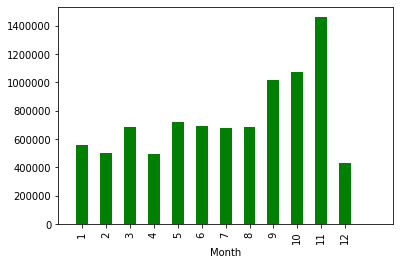

In [118]:
df.groupby(['Month'])['Revenue'].sum().plot.bar(color="g")
plt.xlim(-1,13)

In [119]:
cumulative_revenue=df.groupby(['Month']).Revenue.cumsum()
cumulative_revenue

0             19.50
1             30.00
2             40.50
3             51.00
4             63.50
            ...    
499423    433607.36
499424    433619.96
499425    433636.56
499426    433653.16
499427    433668.01
Name: Revenue, Length: 499428, dtype: float64

In [120]:
sales['monthlygrowth']=sales['Revenue'].pct_change()
sales

,Year,Month,Revenue,monthlygrowth
0,2011,1,560000.260,NaN
1,2011,2,498062.650,-0.110603
2,2011,3,683267.080,0.371850
3,2011,4,493207.121,-0.278163
4,2011,5,723333.510,0.466592
5,2011,6,691123.120,-0.044530
6,2011,7,681300.111,-0.014213
7,2011,8,682680.510,0.002026
8,2011,9,1019687.622,0.493653
9,2011,10,1070704.670,0.050032


Text(0.5, 1.0, 'monthlygrowth')

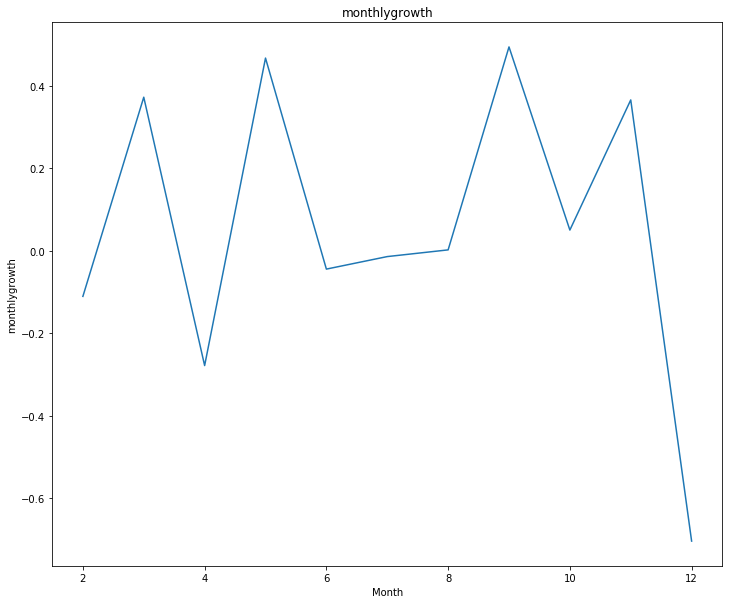

In [121]:
fig=plt.subplots(figsize=(12,10))
Mg = sns.lineplot(x = 'Month', y = 'monthlygrowth', data=sales, sort= False)
Mg.set_title('monthlygrowth')

In [ ]:
7. Extract and Plot the following:
a. Revenue by country
b. Total  customerID by country and month
c. Total orders by country and month
d. Total SKU (distinct count of Stock code) by country and month
e. Monthly revenue (avg) per order

In [123]:
revenue_per_country = df.groupby(['Country'])['Revenue'].sum().sort_values(ascending=False)
revenue_per_country = revenue_per_country.to_frame()
revenue_per_country.head()

,Revenue
Country,
United Kingdom,7.511064e+06
Netherlands,2.758771e+05
EIRE,2.542469e+05
Germany,2.071354e+05
France,1.878285e+05


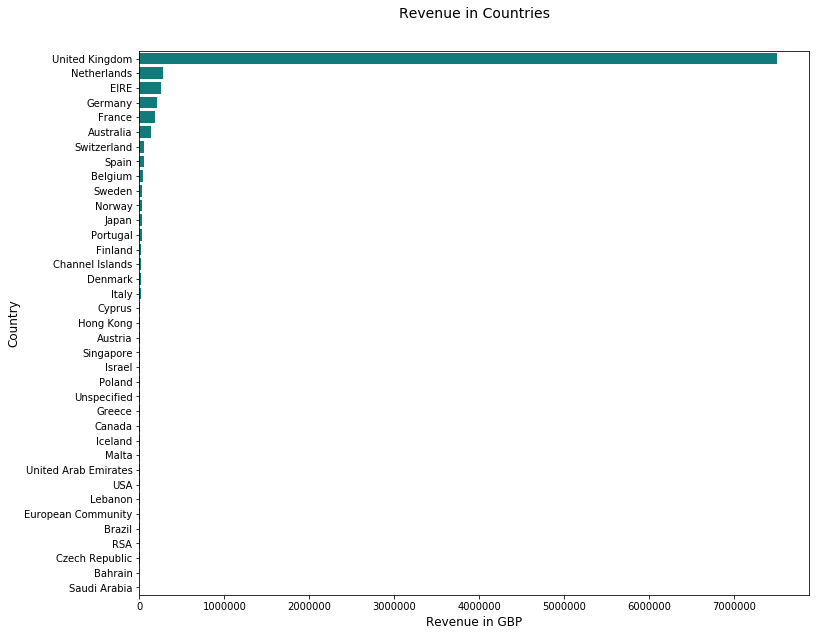

In [124]:
d = sns.barplot(x = 'Revenue', y = revenue_per_country.index , data =revenue_per_country, color = 'darkcyan')
d.figure.set_size_inches(12,10)
d.set_xlabel('Revenue in GBP', size = 12)
d.set_ylabel('Country', size = 12)
d.set_title('Revenue in Countries', size = 14, y = 1.05)
plt.show()

In [203]:
order_per_country1 = df.groupby(['Country'])['CustomerID'].nunique()
order_per_country1 = order_per_country1.to_frame()
order_per_country1.head()

,CustomerID
Country,
Australia,9
Austria,10
Bahrain,3
Belgium,25
Brazil,1


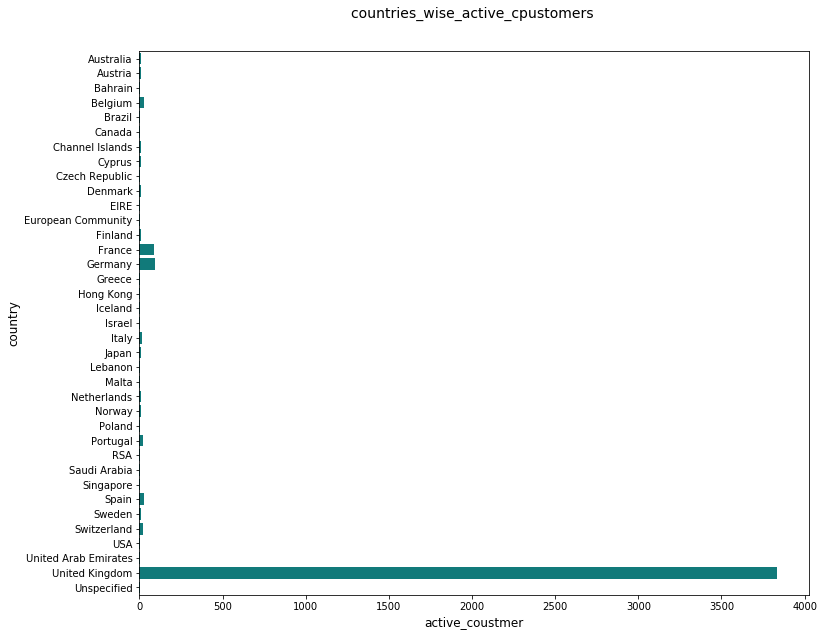

In [213]:
d = sns.barplot(x = 'CustomerID', y = order_per_country1.index , data = order_per_country1, color = 'darkcyan')
d.figure.set_size_inches(12, 10)
d.set_xlabel('active_coustmer', size = 12)
d.set_ylabel('country', size = 12)
d.set_title('countries_wise_active_cpustomers ', size = 14, y = 1.05)
plt.show()

In [129]:
detail = df.groupby(['Month'])['CustomerID'].nunique()
detail=detail.to_frame()
detail

,CustomerID
Month,
1,783
2,799
3,1021
4,899
5,1079
6,1051
7,994
8,980
9,1302


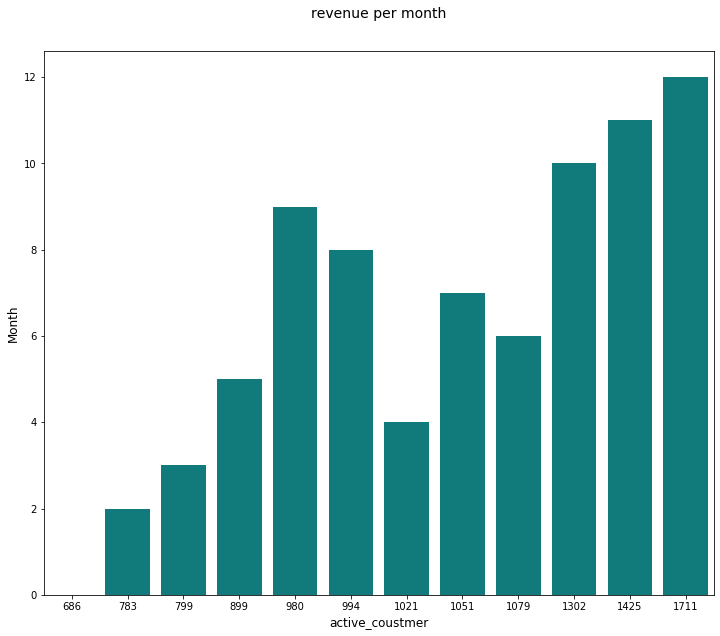

In [210]:
d = sns.barplot(x = 'CustomerID', y = detail.index , data = detail, color = 'darkcyan')
d.figure.set_size_inches(12, 10)
d.set_xlabel('active_coustmer', size = 12)
d.set_ylabel('Month', size = 12)
d.set_title('revenue per month', size = 14, y = 1.05)
plt.show()

In [131]:
stockcode= df.groupby(['Country'])['StockCode'].nunique().sort_values()
stockcode = stockcode.to_frame()
stockcode

,StockCode
Country,
Saudi Arabia,9
Bahrain,16
Czech Republic,25
Brazil,32
Lebanon,45
European Community,50
RSA,58
United Arab Emirates,68
Iceland,87


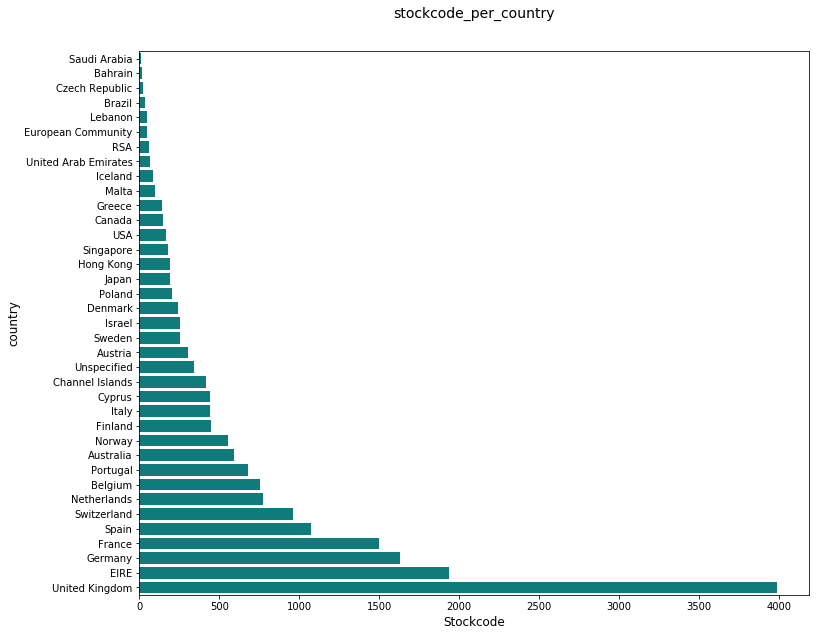

In [132]:
d = sns.barplot(x = 'StockCode', y = stockcode.index , data = stockcode, color = 'darkcyan')
d.figure.set_size_inches(12, 10)
d.set_xlabel('Stockcode', size = 12)
d.set_ylabel('country', size = 12)
d.set_title('stockcode_per_country', size = 14, y = 1.05)
plt.show()

In [133]:
stockcode_per_month= df.groupby(['Month'])['StockCode'].nunique().sort_values()
stockcode_per_month = stockcode_per_month.to_frame()
stockcode_per_month

,StockCode
Month,
2,2431
12,2494
5,2505
4,2558
3,2562
8,2614
1,2645
6,2672
7,2748


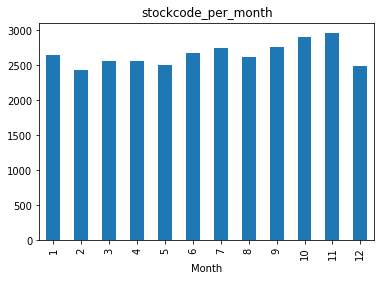

In [134]:
df.groupby(['Month']).StockCode.nunique().plot(kind='bar', title='stockcode_per_month')

In [ ]:
8. Find whether a customer is the new customer or not. A new customer would be figured
out based on their first date of purchase. Figure out new customer on monthly basis.
9. Find total revenue per month for new and existing customer per month. Show it in a
visual.
10. Calculate total revenue per month by day for new and existing customer – in same
graph. (You can use line graph)
11. Calculate monthly retention rate (using crosstab() function of pandas) and find out total
retained user on a monthly basis.
Note: Good research and understanding would be required over here.

In [135]:
new_customer= df.groupby('CustomerID').Date.min().reset_index()
new_customer

,CustomerID,Date
0,12346,2011-01-18
1,12347,2011-01-26
2,12348,2011-01-25
3,12349,2011-11-21
4,12350,2011-02-02
...,...,...
4239,18280,2011-03-07
4240,18281,2011-06-12
4241,18282,2011-08-05
4242,18283,2011-01-06


In [136]:
new_customer.columns = ['CustomerID', 'firstpurchasedate']
new_customer.columns

Index(['CustomerID', 'firstpurchasedate'], dtype='object')

In [137]:
new_customer['firstpurchasemonth'] = new_customer['firstpurchasedate'].map(lambda Date: Date.month)
new_customer 

,CustomerID,firstpurchasedate,firstpurchasemonth
0,12346,2011-01-18,1
1,12347,2011-01-26,1
2,12348,2011-01-25,1
3,12349,2011-11-21,11
4,12350,2011-02-02,2
...,...,...,...
4239,18280,2011-03-07,3
4240,18281,2011-06-12,6
4241,18282,2011-08-05,8
4242,18283,2011-01-06,1


In [138]:
df = pd.merge(df,new_customer, on='CustomerID')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Date,Revenue,firstpurchasedate,firstpurchasemonth
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,2011,1,4,2011-01-04,19.50,2011-01-04,1
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,2011,1,4,2011-01-04,10.50,2011-01-04,1
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,2011,1,4,2011-01-04,10.50,2011-01-04,1
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,2011,1,4,2011-01-04,10.50,2011-01-04,1
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,2011,1,4,2011-01-04,12.50,2011-01-04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499423,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713,Germany,2011,12,9,2011-12-09,15.00,2011-12-09,12
499424,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713,Germany,2011,12,9,2011-12-09,10.20,2011-12-09,12
499425,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713,Germany,2011,12,9,2011-12-09,10.20,2011-12-09,12
499426,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713,Germany,2011,12,9,2011-12-09,24.96,2011-12-09,12


In [139]:
df['customertype'] = 'new'
df.loc[df['Month']>df['firstpurchasemonth'],'customertype'] = 'existing'

In [140]:
customertype_count = df.groupby(['Month','customertype'])['InvoiceNo'].count()
customertype_count

Month  customertype
1      new             35147
2      existing        16102
       new             11605
3      existing        23127
       new             13621
4      existing        20791
       new              9125
5      existing        30000
       new              7030
6      existing        30530
       new              6344
7      existing        33999
       new              5519
8      existing        30044
       new              5240
9      existing        41420
       new              8806
10     existing        48258
       new             12484
11     existing        71981
       new             12730
12     existing        24467
       new              1058
Name: InvoiceNo, dtype: int64

In [141]:
customertype_revenue = df.groupby(['Month','customertype'])['Revenue'].sum().reset_index()
customertype_revenue

,Month,customertype,Revenue
0,1,new,560000.260
1,2,existing,284161.540
2,2,new,213901.110
3,3,existing,459865.220
4,3,new,223401.860
5,4,existing,350685.360
6,4,new,142521.761
7,5,existing,593975.240
8,5,new,129358.270
9,6,existing,591210.160


Text(0.5, 1.0, 'revenue of customertype')

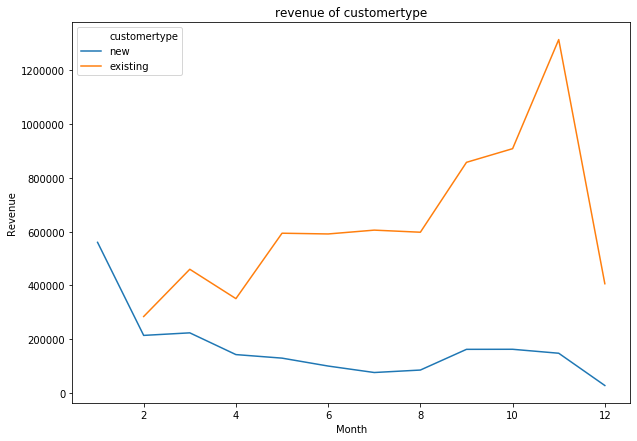

In [142]:
fig = plt.subplots(figsize = (10,7))
ct = sns.lineplot(x='Month' , y= 'Revenue',data =customertype_revenue, hue= 'customertype')
ct.set_title('revenue of customertype')

In [143]:
retained_users = df.groupby(['CustomerID','Month'])['Revenue'].sum().reset_index()
retained_users

,CustomerID,Month,Revenue
0,12346,1,0.00
1,12347,1,475.39
2,12347,4,636.25
3,12347,6,382.52
4,12347,8,584.91
...,...,...,...
12725,18283,10,114.65
12726,18283,11,651.56
12727,18283,12,208.00
12728,18287,5,765.28


In [144]:
Monthly_user_retained = pd.crosstab(retained_users['CustomerID'],retained_users['Month']).reset_index()
Monthly_user_retained

Month,CustomerID,1,2,3,4,5,6,7,8,9,10,11,12
0,12346,1,0,0,0,0,0,0,0,0,0,0,0
1,12347,1,0,0,1,0,1,0,1,0,1,0,1
2,12348,1,0,0,1,0,0,0,0,1,0,0,0
3,12349,0,0,0,0,0,0,0,0,0,0,1,0
4,12350,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,18280,0,0,1,0,0,0,0,0,0,0,0,0
4240,18281,0,0,0,0,0,1,0,0,0,0,0,0
4241,18282,0,0,0,0,0,0,0,1,0,0,0,1
4242,18283,1,1,0,1,1,1,1,0,1,1,1,1


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499428 entries, 0 to 499427
Data columns (total 16 columns):
InvoiceNo             499428 non-null object
StockCode             499428 non-null object
Description           499428 non-null object
Quantity              499428 non-null int64
InvoiceDate           499428 non-null datetime64[ns]
UnitPrice             499428 non-null float64
CustomerID            499428 non-null int32
Country               499428 non-null object
Year                  499428 non-null int64
Month                 499428 non-null int64
Day                   499428 non-null int64
Date                  499428 non-null object
Revenue               499428 non-null float64
firstpurchasedate     499428 non-null object
firstpurchasemonth    499428 non-null int64
customertype          499428 non-null object
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(7)
memory usage: 62.9+ MB


# RFM 

In [146]:
from datetime import timedelta

In [147]:
recent_date = df['InvoiceDate'].max()+timedelta(days=1)
recent_date

Timestamp('2011-12-10 12:50:00')

In [148]:
retail_RFM = df.groupby('CustomerID').agg({'InvoiceDate':lambda x:(df['InvoiceDate'].max().date()-x.max().date()).days})
retail_RFM 

,InvoiceDate
CustomerID,
12346,325
12347,2
12348,75
12349,18
12350,310
...,...
18280,277
18281,180
18282,7


In [61]:
df.groupby('CustomerID').agg({'InvoiceNo':'count'})

,InvoiceNo
CustomerID,
12346.0,2
12347.0,151
12348.0,14
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,13


In [62]:
df.groupby('CustomerID').agg({'Revenue':'sum'})

,Revenue
CustomerID,
12346.0,0.00
12347.0,3598.21
12348.0,904.44
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [63]:
RFM = df.groupby('CustomerID').agg({'InvoiceDate':lambda x:(df['InvoiceDate'].max().date()-x.max().date()).days,'InvoiceNo':'count','Revenue':'sum'})
RFM 

,InvoiceDate,InvoiceNo,Revenue
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,151,3598.21
12348.0,75,14,904.44
12349.0,18,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,13,176.60


In [64]:
RFM.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'Revenue':'Monetary' },inplace= True)

In [65]:
r_labels = range(4,0,-1); f_labels = range(1,5);
m_labels = range(1,5)

In [66]:
RFM['r_quartile'] = pd.qcut(RFM['Recency'],q = 4 ,labels= r_labels)
RFM['f_quartile'] = pd.qcut(RFM['Frequency'],q = 4 , labels=f_labels,duplicates = 'drop')
RFM['m_quartile'] = pd.qcut(RFM['Monetary'], q = 4 ,labels= m_labels)

In [67]:
RFM.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,2,0.00,1,1,1
12347.0,2,151,3598.21,4,4,4
12348.0,75,14,904.44,2,1,3
12349.0,18,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


In [68]:
RFM['RFM_Score'] = RFM.r_quartile.astype(str)+ RFM.f_quartile.astype(str) + RFM.m_quartile.astype(str)
RFM.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,2,0.00,1,1,1,111
12347.0,2,151,3598.21,4,4,4,444
12348.0,75,14,904.44,2,1,3,213
12349.0,18,73,1757.55,3,3,4,334
12350.0,310,17,334.40,1,1,2,112


In [69]:
RFM['RFM_score']= RFM[['r_quartile','f_quartile','m_quartile']].sum(axis=1)

In [70]:
RFM.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RFM_score
CustomerID,,,,,,,,
12346.0,325,2,0.00,1,1,1,111,3.0
12347.0,2,151,3598.21,4,4,4,444,12.0
12348.0,75,14,904.44,2,1,3,213,6.0
12349.0,18,73,1757.55,3,3,4,334,10.0
12350.0,310,17,334.40,1,1,2,112,4.0


In [71]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4245 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
Recency       4245 non-null int64
Frequency     4245 non-null int64
Monetary      4245 non-null float64
r_quartile    4245 non-null category
f_quartile    4245 non-null category
m_quartile    4245 non-null category
RFM_Score     4245 non-null object
RFM_score     4245 non-null float64
dtypes: category(3), float64(2), int64(2), object(1)
memory usage: 211.8+ KB


In [72]:
RFM['RFM_score'] = RFM[['RFM_score']].astype(int)

In [73]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4245 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
Recency       4245 non-null int64
Frequency     4245 non-null int64
Monetary      4245 non-null float64
r_quartile    4245 non-null category
f_quartile    4245 non-null category
m_quartile    4245 non-null category
RFM_Score     4245 non-null object
RFM_score     4245 non-null int32
dtypes: category(3), float64(1), int32(1), int64(2), object(1)
memory usage: 195.2+ KB


In [74]:
RFM.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RFM_score
CustomerID,,,,,,,,
12346.0,325,2,0.00,1,1,1,111,3
12347.0,2,151,3598.21,4,4,4,444,12
12348.0,75,14,904.44,2,1,3,213,6
12349.0,18,73,1757.55,3,3,4,334,10
12350.0,310,17,334.40,1,1,2,112,4


In [75]:
def rfm_categorise(df):
    if df['RFM_score']>=9:
        return 'Best_customer'
    elif((df['RFM_score']>=7) and (df['RFM_score']<9)):
        return 'high_customer'
    elif((df['RFM_score']>=5) and (df['RFM_score']<7)):
        return 'loyal_customer'
    elif((df['RFM_score']>=6) and (df['RFM_score']<7)):
        return 'potential_customer'
    elif((df['RFM_score']>=4) and (df['RFM_score']<6)):
        return ' medium_customer'
    
    else:
        return 'worst_customer'
             

In [76]:
RFM['RFM_level'] = RFM.apply( rfm_categorise , axis =1)

In [77]:
RFM.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RFM_score,RFM_level
CustomerID,,,,,,,,,
12346.0,325,2,0.00,1,1,1,111,3,worst_customer
12347.0,2,151,3598.21,4,4,4,444,12,Best_customer
12348.0,75,14,904.44,2,1,3,213,6,loyal_customer
12349.0,18,73,1757.55,3,3,4,334,10,Best_customer
12350.0,310,17,334.40,1,1,2,112,4,medium_customer


# k- means clustring using with RFM

In [86]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [87]:
x = RFM[['Recency','Frequency','Monetary']]
scaler = MinMaxScaler()
RFM_scaled = scaler.fit_transform(x)

In [91]:
RFM_scaled = pd.DataFrame(RFM_scaled)
RFM_scaled.columns = ['Recency','Frequency','Monetary']
RFM_scaled.head()

,Recency,Frequency,Monetary
0,0.958702,0.000008,0.003409
1,0.005900,0.001256,0.006270
2,0.221239,0.000109,0.004128
3,0.053097,0.000603,0.004807
4,0.914454,0.000134,0.003675


In [94]:
wcss = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(RFM_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)

[63.357633926196165, 31.87161692157704, 17.576531546253186, 12.329985030326945, 9.44732388641453, 7.432088681097631, 5.457350668905031, 4.115944977587933, 3.269359263589104]


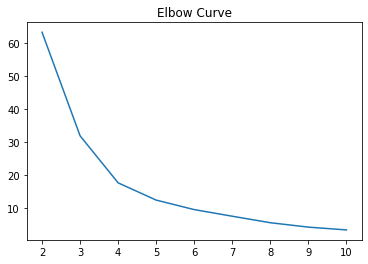

In [96]:
plt.plot(range(2,11),wcss)
plt.title("Elbow Curve")
plt.show()

In [195]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(RFM_scaled)
lbs =kmeans.labels_
print(kmeans.labels_)

[2 0 1 ... 0 0 0]


In [196]:
RFM['clusterID']= lbs
RFM.head(10)

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RFM_score,RFM_level,clusterID
CustomerID,,,,,,,,,,
12346.0,325,2,0.00,1,1,1,111,3,worst_customer,2
12347.0,2,151,3598.21,4,4,4,444,12,Best_customer,0
12348.0,75,14,904.44,2,1,3,213,6,loyal_customer,1
12349.0,18,73,1757.55,3,3,4,334,10,Best_customer,0
12350.0,310,17,334.40,1,1,2,112,4,medium_customer,2
12352.0,36,95,1545.41,3,3,3,333,9,Best_customer,0
12353.0,204,4,89.00,1,1,1,111,3,worst_customer,1
12354.0,232,58,1079.40,1,3,3,133,7,high_customer,2
12355.0,214,13,459.40,1,1,2,112,4,medium_customer,1


In [197]:
RFM.describe()

,Recency,Frequency,Monetary,RFM_score,clusterID
count,4245.000000,4245.000000,4.245000e+03,4245.000000,4245.000000
mean,83.318021,117.650883,2.119857e+03,7.504594,0.610130
std,90.211894,1845.497182,2.076382e+04,2.820049,0.685408
min,0.000000,1.000000,-4.287630e+03,3.000000,0.000000
25%,16.000000,17.000000,2.910000e+02,5.000000,0.000000
50%,46.000000,41.000000,6.428000e+02,7.000000,0.000000
75%,127.000000,98.000000,1.566000e+03,10.000000,1.000000
max,339.000000,119449.000000,1.253329e+06,12.000000,2.000000


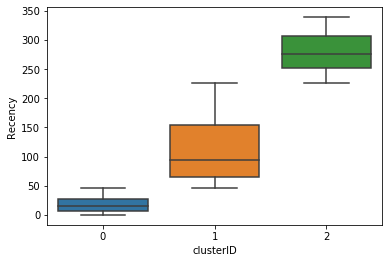

In [198]:
sns.boxplot(x='clusterID', y='Recency', data = RFM)

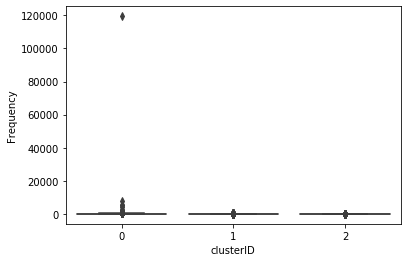

In [199]:
sns.boxplot(x='clusterID', y='Frequency', data = RFM)

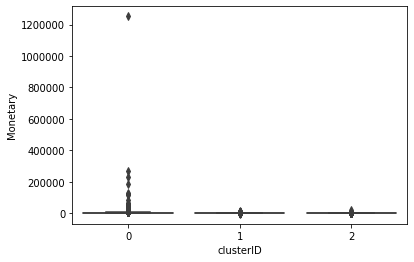

In [200]:
sns.boxplot(x='clusterID', y='Monetary', data = RFM)